# Assessment 0

The document below outlines the research I have done into cybersecurity data including code run on that data produced both by myself and obtained from research. The three pieces of data I've analysed are:

1. Tunnel Dataset
2. Umbrella Popularity List
3. Credit Card Fraud Dataset

This data has allowed me to look into some of the examples of big cybersecurity data that I may encounter and given me a better understanding of the use of python to analyse tbis data. 

The three data sets, 'tunnel.csv', 'top-1m.csv' and 'creditcard.csv' should be saved to the same folder as this document to allow them to be accessed. They can be obtained from the websites given in the references at the end of the document.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
import requests
from io import StringIO

%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# Analysis of Tunnel Dataset

A tunneling protocol is a communications protocol that allows for the movement of data from one network to another. It involves allowing private network communications to be sent across a public network (such as the Internet) through a process called encapsulation.

First we need to download the data. The first method for doing this we will use is using requests.get from the requests library.

In [2]:
orig_url_T='https://drive.google.com/file/d/1B7MbtYBTt8REp7lDdL3eIy3ahmftT7hp/view?usp=sharing'
file_id_T = orig_url_T.split('/')[-2] 
dwn_url_T='https://drive.google.com/uc?export=download&id=' + file_id_T
url_T = requests.get(dwn_url_T).text #
csv_raw_T = StringIO(url_T)

df_tunnel = pd.read_csv(csv_raw_T)

This initial data analysis is from [3] and shows us the amount of values in the data, whether there are any missing values and what the data is.

In [3]:
#DataFrame with columns
columns = pd.DataFrame(list(df_tunnel.columns.values[1:]))

#DataFrame with data types
data_types = pd.DataFrame(df_tunnel.dtypes, columns=['Data Type'])

#DataFrame with Count
data_count = pd.DataFrame(df_tunnel.count(), columns=['Count'])

#DataFrame with unique values
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df_tunnel.columns.values):
    unique_value_counts.loc[v] = [df_tunnel[v].nunique()]

missing_data_counts = pd.DataFrame(df_tunnel.isnull().sum(), columns=['Missing Values'])
data_quality_report = data_types.join(data_count).join(unique_value_counts).join(missing_data_counts)
print('Data Quality Report')
data_quality_report

Data Quality Report


,Data Type,Count,Unique Values,Missing Values
ts,float64,280,280,0
uid,object,280,140,0
id.orig_h,object,280,3,0
id.orig_p,int64,280,139,0
id.resp_h,object,280,81,0
id.resp_p,int64,280,1,0
tunnel_type,object,280,1,0
action,object,280,2,0


First we want to get a feel for what the data looks like. We do this using the .head() function to view the top 5 entries of the data frame.

In [4]:
df_tunnel.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,tunnel_type,action
0,1.331904e+09,CAZ2pG3tEWcozhPPzi,192.168.202.110,60807,192.168.27.25,3544,Tunnel::TEREDO,Tunnel::DISCOVER
1,1.331904e+09,CZVmMe12RoVbuz74u5,192.168.202.110,43126,192.168.27.102,3544,Tunnel::TEREDO,Tunnel::DISCOVER
2,1.331904e+09,CAZ2pG3tEWcozhPPzi,192.168.202.110,60807,192.168.27.25,3544,Tunnel::TEREDO,Tunnel::CLOSE
3,1.331904e+09,CaAV5W3NRFhcBUqY8a,192.168.202.110,50625,192.168.27.152,3544,Tunnel::TEREDO,Tunnel::DISCOVER
4,1.331904e+09,CKf4q51yEqO6jvaw66,192.168.202.110,44569,192.168.27.202,3544,Tunnel::TEREDO,Tunnel::DISCOVER


From the example assessment, we know ts should be a time stamp and therefore we will use the same code form there but applied to our data to change this to a time stamp type.

In [5]:
from datetime import datetime
df_tunnel['ts'] = [datetime.fromtimestamp(float(date)) for date in df_tunnel['ts'].values]

We can check to see if this has worked using the following code to see what the data in the first cell is now.

In [6]:
df_tunnel['ts'].values[1]

numpy.datetime64('2012-03-16T13:18:52.830000000')

In [7]:
origIP_t_type = df_tunnel.groupby(['id.orig_h','action']).size()
origIP_t_type = pd.DataFrame(origIP_t_type)

respIP_t_type = df_tunnel.groupby(['id.resp_h','action']).size().sort_values(ascending=False)
respIP_t_type = pd.DataFrame(respIP_t_type)

#pd.DataFrame.head(origIP_t_type)
respIP_t_type

0
id.resp_h      action             
192.168.21.1   Tunnel::CLOSE     3
192.168.27.1   Tunnel::CLOSE     3
192.168.22.1   Tunnel::DISCOVER  3
192.168.22.102 Tunnel::CLOSE     3
192.168.23.103 Tunnel::DISCOVER  3
...                             ..
192.168.25.103 Tunnel::DISCOVER  1
               Tunnel::CLOSE     1
192.168.25.102 Tunnel::DISCOVER  1
               Tunnel::CLOSE     1
192.168.28.254 Tunnel::DISCOVER  1

[162 rows x 1 columns]

This groupby above gives me a bit more of an understanding about Tunneling. This is my first time learning about it so the above data shows me that each time an IP contacts another IP, we Disover and Close.

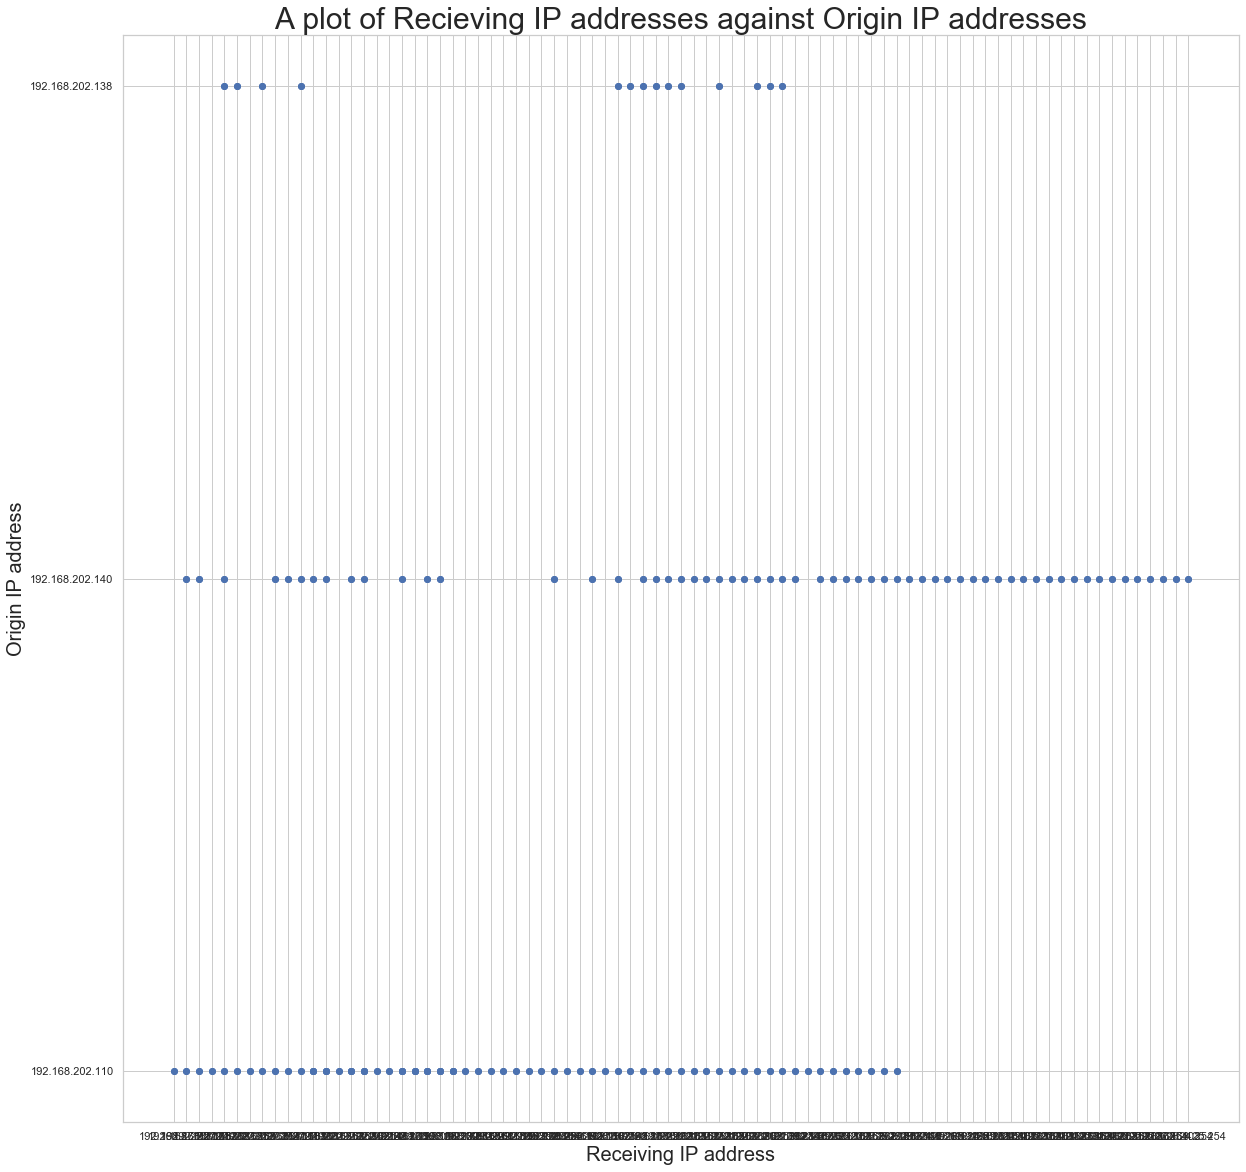

In [8]:
plt.figure(figsize = (20,20))

plt.scatter(df_tunnel['id.resp_h'],df_tunnel['id.orig_h'])
plt.xlabel('Receiving IP address', fontsize = 20)
plt.ylabel('Origin IP address', fontsize = 20)
plt.title('A plot of Recieving IP addresses against Origin IP addresses', fontsize = 30)

plt.show()

# Analysis of Umbrella Popularity List

We first import the data into a data frame to review. The data, top-1m.csv can be downloaded from the link in the references and imported using the commented code but in this case, we will read directly from the URL.

In [9]:
url_upl = 'http://s3-us-west-1.amazonaws.com/umbrella-static/top-1m.csv.zip'
df_t1m = pd.read_csv(url_upl, low_memory=False)
# df_t1m = pd.read_csv('top-1m.csv')

In [10]:
pd.DataFrame.head(df_t1m)

,1,google.com
0,2,www.google.com
1,3,microsoft.com
2,4,facebook.com
3,5,netflix.com
4,6,windowsupdate.com


We can see from the above data frame that there are no column headers so "1" and "google.com" have becomed de-facto headers on the data frame so we need to adjust this first.

In [11]:
df_t1m.loc[-1] = ['1','google.com']
df_t1m.index = df_t1m.index + 2
df_t1m.sort_index(inplace=True)
df_t1m.columns = ['i','URL']
del df_t1m['i']

In [12]:
pd.DataFrame.head(df_t1m)

,URL
1,google.com
2,www.google.com
3,microsoft.com
4,facebook.com
5,netflix.com


To start analysis, we'll look at the domain registration for each URL. These are the '.com', '.net' etc. This will require some string manipulation to achieve but will allow us to plot the relative frequencies of them. I ran a for loop to search for '.' throughout the strings and remove all the text before them until I got to the last '.'. I'm sure there is a faster way to do this but I couldn't figure out the python version of gsub.

In [13]:
for i in range(0,len(df_t1m)):
    
    string = df_t1m.iat[i,0]
        
    j = string.count('.')
    
    k = 0
    
    while k < j:

        if "." in string:
            
            string = string[string.index('.')+1:]
            k = k + 1
   
    df_t1m.iat[i,0] = string

In [14]:
pd.DataFrame.head(df_t1m)

,URL
1,com
2,com
3,com
4,com
5,com


We now have all the domain names and want to look at how often each one occurs.

In [15]:
domains = df_t1m.groupby('URL').size().sort_values(ascending=False)
domains = pd.DataFrame(domains)
domains.reset_index(level=0, inplace=True)
domains.set_index('URL')
domains.columns = ['Domain','Count']
pd.DataFrame.head(domains)

,Domain,Count
0,com,522923
1,net,125974
2,org,33801
3,cn,23735
4,ru,16686


We now have access to a data frame with a single row for each domain but we want to ignore the small outliers where there are few results, of the 1,000,000, that use this domain. This is because there are over 1800 URLs in the table and we wont fit this many on a plot (while maintaining how informative it is).

<Figure size 432x288 with 0 Axes>

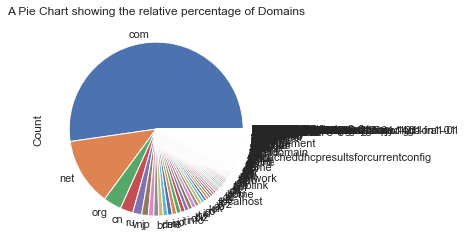

In [16]:
plt.figure()
domains.plot(kind = 'pie', y = 'Count', legend = False, labels = domains['Domain'], 
          title = 'A Pie Chart showing the relative percentage of Domains')
plt.show()

The above plot shows the concerns we have with the amount of data available. It is almost impossible to understand the relative frequencies of the URLs other than that .com dominates and .net is the second largest. Thus we need to isolate the larger frequencies.

In [17]:
domains_top10 = domains.loc[0:9]
domains_top10

,Domain,Count
0,com,522923
1,net,125974
2,org,33801
3,cn,23735
4,ru,16686
5,vn,12270
6,jp,10203
7,br,9081
8,de,8519
9,me,8419


<Figure size 576x576 with 0 Axes>

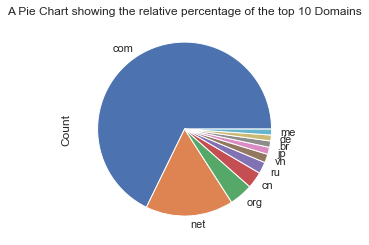

In [18]:
plt.figure(figsize=(8,8))
domains_top10.plot(kind = 'pie', y = 'Count', legend = False, labels = domains_top10['Domain'],
               title = 'A Pie Chart showing the relative percentage of the top 10 Domains')
plt.show()

Doing some research on plotting I came across this website: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#15.-Ordered-Bar-Chart with some interesting visualisations of data using matpyplot. One of the graphs that looked applicable here is the treemap which is shown below on the top 10 domains.

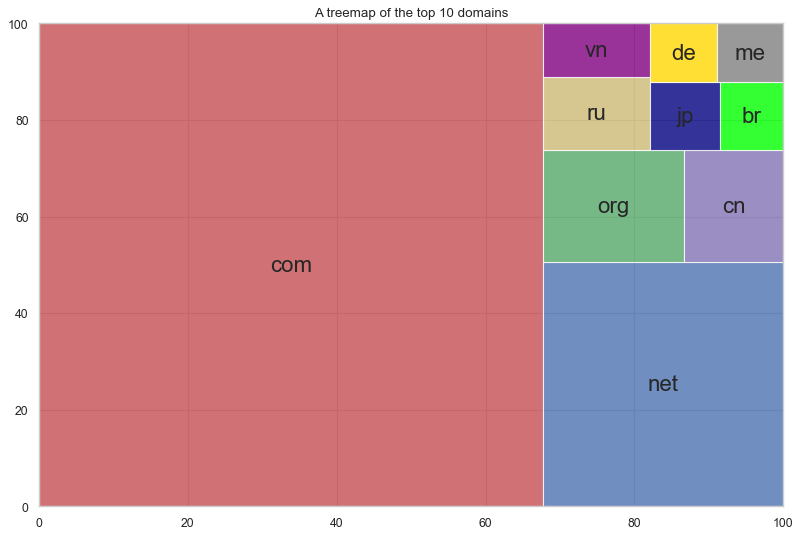

In [19]:
!pip install squarify
import squarify

sizes = domains_top10['Count']
labels = domains_top10['Domain']

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=['r','b','g','m','y','purple','navy','lime','gold','grey'],
              alpha=.8, text_kwargs={'fontsize':20})

plt.title('A treemap of the top 10 domains')
plt.show()

Again from the plot above we can see that .com dominates and .net is slightly behind. I prefer this visualisation since I think it is easier to see the data clearly. 

Finally, I'm going to analyse the smaller domain names in the data set. The code below runs through the domains and finds the first one that has value 1. At this point, the URLs are uncommon and mostly unkown.

In [20]:
for j in range(0,1801):
    
    if domains['Count'][j] == 1:
        
        print('There are ' + str(len(domains)-j) + ' domains out of ' + str(len(domains)) + ' with only one occurence in the top 1,000,000. These domains are most likely rarely used.')
        
        break

There are 782 domains out of 1890 with only one occurence in the top 1,000,000. These domains are most likely rarely used.


# Credit Card Fraud Analysis

The data here is 150mb and therefore cannot be uploaded to github so before running this it should be downloaded to the same folder as this notebook is in. It can be downloaded from link [9].

The data here represents credit card fraud data collected. The data includes a class section and amount section which represent whether fraud was committed and the value of the transaction respectively. Class 0 is a normal transaction while class 1 is a fraudulent transaction.

In [21]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [22]:
ccf_data = pd.read_csv("creditcard.csv")

In [23]:
ccf_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We'll create histograms of all the columns here to analyse the general trends of the data.

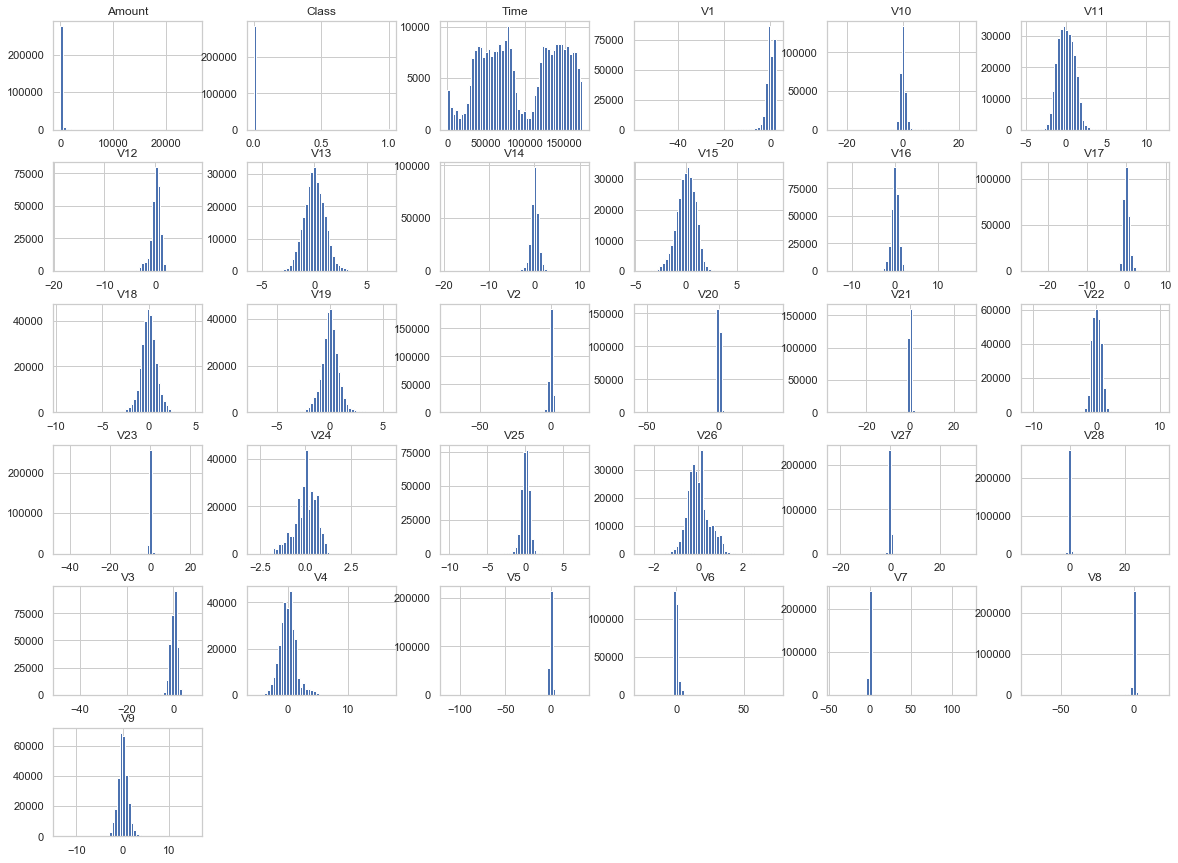

In [24]:
ccf_data.hist(bins=50,figsize=(20,15))
plt.show()

First we'll look at the percentage of fraudulent transactions. This can be analysed below by counting the occurences of 0's and 1's in the Class column.

In [25]:
ccf_data['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

As we can see above, the fraudulent transactions represent a minute amount of the data, only 0.1727% of the overall transactions in the data were fraudulent. We'll look at a summary of just the fraudulent transactions now.

In [26]:
ccf_trans = ccf_data[ccf_data['Class'] == 1]
ccf_trans.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [27]:
ccf_trans_desc = ccf_trans.describe()
ccf_trans_desc.drop('count', axis = 0, inplace =  True)
ccf_trans_desc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


We can compare this data to the normal transaction data and see if there are any major differences between the two.

In [28]:
cc_trans = ccf_data[ccf_data['Class'] == 0]
cc_trans.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
cc_trans_desc = cc_trans.describe()
cc_trans_desc.drop('count', axis = 0, inplace =  True)
cc_trans_desc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


Looking at the data sets, it doesn't look as if there are any major differences between the fraudulent and genuine transactions when reviewing the amount column. There are 28 other columns which may provide valuable insight but these are difficult to analyse by eye. We will produce box and whisker plots of the two amount data sets to see if there are any major differences.

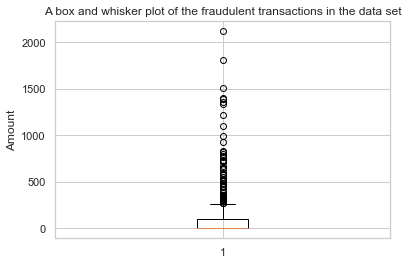

In [30]:
ccf_trans_amount = pd.DataFrame(ccf_trans['Amount'])

plt.plot()

plt.boxplot(ccf_trans_amount['Amount'])
plt.ylabel('Amount')
plt.title('A box and whisker plot of the fraudulent transactions in the data set')
           
plt.show()

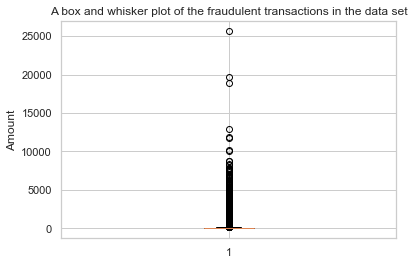

In [31]:
cc_trans_amount = pd.DataFrame(cc_trans['Amount'])

plt.plot()

plt.boxplot(cc_trans_amount['Amount'])
plt.ylabel('Amount')
plt.title('A box and whisker plot of the fraudulent transactions in the data set')

plt.show()

Within the analysis of the credit card data frame by 'kernel7a055de514' machine learning is used to create a classifier for fraudulent transactions. I have little knowledge of Machine learning but will download the code and add it to this file to see how it runs and try to understand the way it works. Comments on the code will demonstrate my own understanding of the process used in this machine learning.

## Train/Test Split

Divide the dataset into training and testing sets.

In [32]:
X = ccf_data.drop(labels='Class',axis = 1) # Features data
y = ccf_data.loc[:,'Class'] # Response data
# del transactions # Delete the original data

I will use a test size of 20%. I will also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

In [33]:
from sklearn.model_selection import train_test_split

/Users/User-MC/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/User-MC/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/User-MC/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [34]:
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , 
                                                     random_state=1 , stratify = y)
# Splits the data into training and testing data with a test size of 20% 

In [35]:
X_train.shape,X_test.shape

((227845, 30), (56962, 30))

In [36]:
#to flag off warnings
X_train.is_copy = False
X_test.is_copy = False

/Users/User-MC/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)


## Data Analysis

In [37]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [38]:
# Convert seconds to hours for easy of calculations

X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

In [39]:
# Time of last transaction in days
X_train['Time'].max() / 24

1.9999074074074075

The fraudulent transactions occur at every 2 days

Text(0.5, 1.0, 'Transaction times')

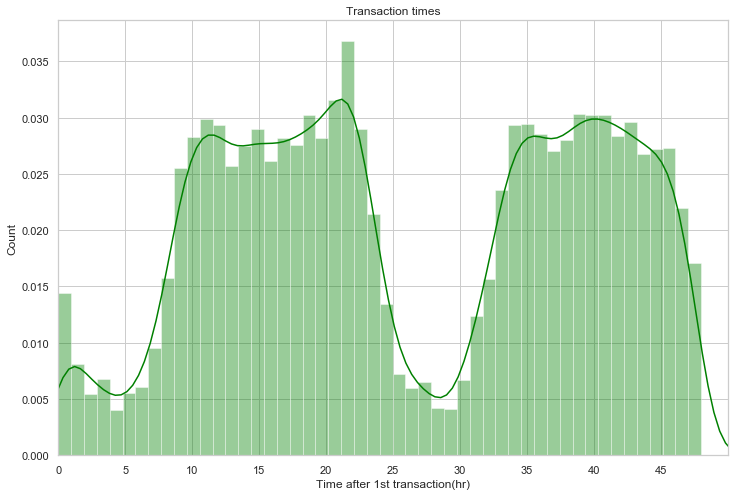

In [40]:
# Histogram of transition times. 
plt.figure(figsize=(12,8))
sns.distplot(X_train['Time'],bins=50,color='green')
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Time after 1st transaction(hr)')
plt.ylabel('Count')
plt.title('Transaction times')

Thus, it can be observed that there are 2 lulls during the nighttime on each day.

In [41]:
# Summary stats
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Looking at the details, it can be observed that the amonunts appear to be right skewed. This is because we have a huge difference between 75% and 50% and a smaller distance between 25% and 50%. To verify this, lets construct a histogram.

Text(0.5, 1.0, 'Transaction Amounts')

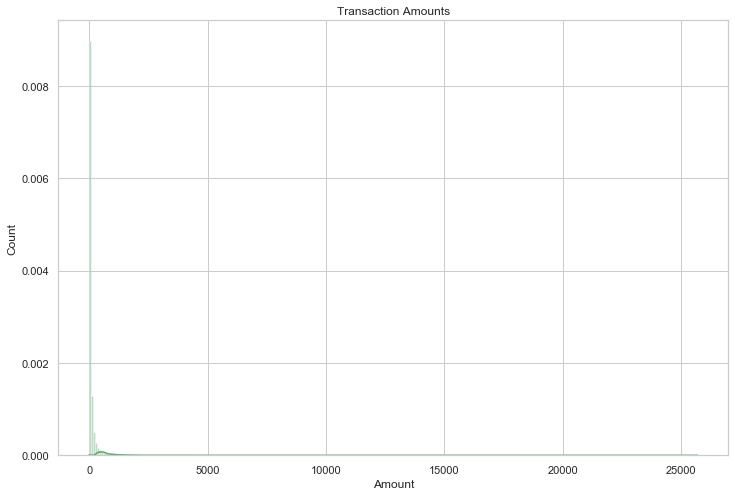

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],bins=300,color='g')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

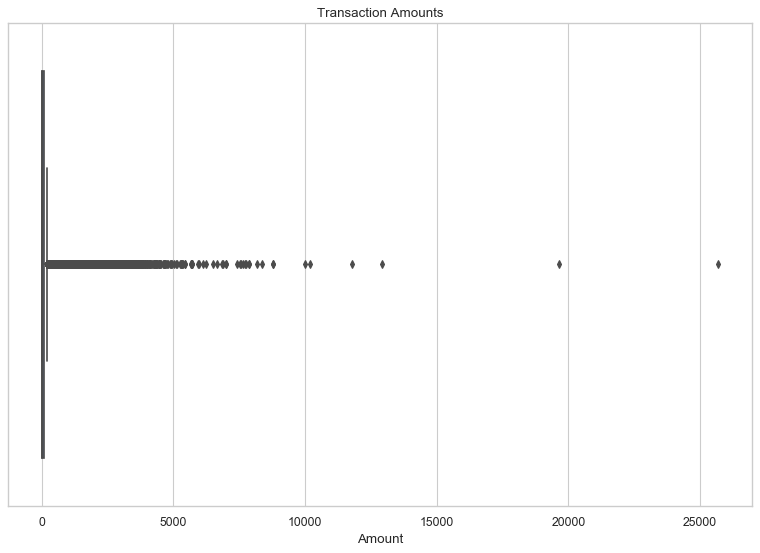

In [43]:
# The box plot as the histogram does not show the details properly.
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

There are no outliers in the left and right side. Thus the amounts were right skewed. We can check for the skewness to be sure.

In [44]:
X_train['Amount'].skew() 
# Returns unbiased skeweness - measure of the asymmetry of the probability distribution

16.910303546516744

Lets remove the skewness and convert the data into a normal distribution.

In [45]:
X_train.loc[:,'Amount'] = X_train['Amount']+ 1e-9
# Shift all amounts by 1e-9

Performing Box-Cox Transform

In [46]:
# This transforms the data using power functions to reduce variance and make it more
# normal distribution looking
from scipy import stats
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

The maximum likelihood estimate of 𝜆 in the Box-Cox transform:

In [47]:
X_train.dropna() # removes na values

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9341,3.766111,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,...,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284,5.423970
210529,38.339444,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,...,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839,7.046292
51525,12.499167,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,-0.667442,...,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691,2.397348
128333,21.853611,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,-0.032670,...,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341,4.774875
252025,43.227222,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,-1.281704,...,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147,3.266353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249626,42.917222,-0.312808,1.571520,0.625071,2.851596,1.440896,0.370273,1.559423,-0.122626,-2.127059,...,-0.013666,-0.072840,-0.276301,-0.144144,-0.813403,-0.094574,-0.086966,0.101273,0.154888,5.135193
188363,35.538889,2.313488,-1.066660,-2.698797,-1.810692,0.181929,-0.825158,0.014053,-0.497443,-2.466535,...,-0.303714,0.175502,0.943729,-0.209989,0.371705,0.688140,0.270351,-0.078804,-0.087019,5.277588
224660,39.973056,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.217607,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,2.382383
206178,37.805000,1.888991,-0.199603,-0.401767,1.366907,-0.105339,0.441041,-0.401390,0.227025,0.894311,...,-0.254580,-0.469722,-1.120237,0.470175,0.620089,-0.347252,-1.155696,0.049377,-0.033304,2.502845


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

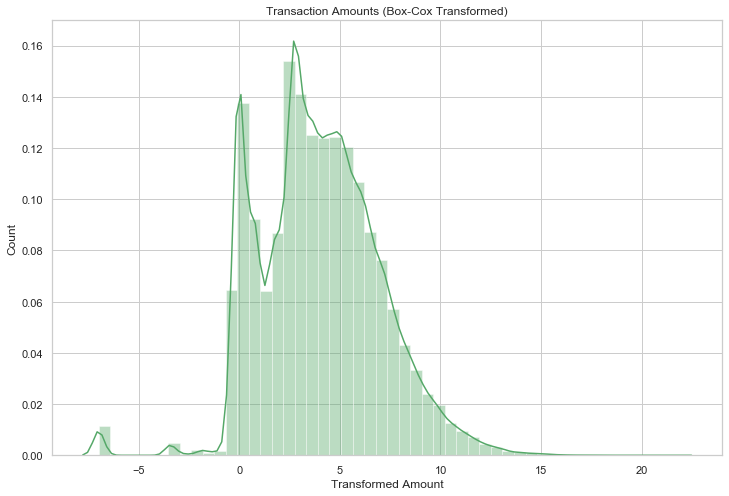

In [48]:
# Plotting newly transformed accounts
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],color='g')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [49]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680567
Name: Amount, dtype: float64

In [50]:
X_train['Amount'].skew()

0.11421485939418571

So our power transform removed most of the skewness in the Amount variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the 𝜆 value estimated on the training data.

In [51]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

/Users/User-MC/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


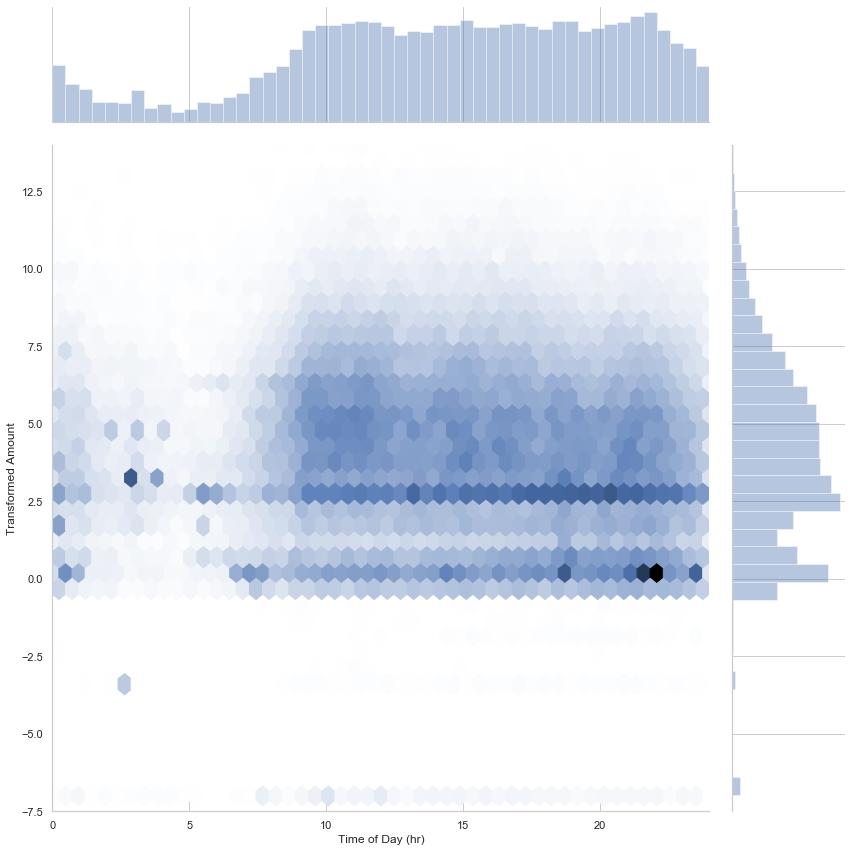

In [52]:
#Time vs Amount
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

The transaction amounts appear to be similarly distributed throughout the daytime hours. However, in the earliest hours of the day, around 5-7 AM, amounts around 2.5 are the most common (recall this is a Box-Cox transformed value). Perhaps everyone's buying their morning coffee?

As my own thoughts, the visualisation of the data above is really good. I like the ability to see denstiy of transacations within the centre graph and also being able to see it using a histogram. This joint plot and hex code may be useful for analysing other data.

Let's compare the descriptive stats of the PCA variables V1-V28.

In [53]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [54]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000713,-0.001034,0.002557,0.003839,-0.002857,0.002085,0.000022,0.000093,0.000243,-0.000363,...,-0.000146,-0.000796,0.000023,0.000897,0.000765,-0.000380,0.000136,-0.000301,-0.000046,-0.000027
std,1.952399,1.636689,1.514288,1.417086,1.383532,1.333769,1.240239,1.200348,1.096453,1.082580,...,0.815140,0.767956,0.733325,0.725353,0.616772,0.605741,0.522184,0.482187,0.405182,0.331048
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.922830,-0.599928,-0.887861,-0.844052,-0.693702,-0.766195,-0.555377,-0.208302,-0.642006,-0.535079,...,-0.456946,-0.212129,-0.227952,-0.541079,-0.162242,-0.354208,-0.317488,-0.327576,-0.070767,-0.053013
50%,0.016743,0.064370,0.180865,-0.016750,-0.055388,-0.271706,0.039185,0.022594,-0.051224,-0.091877,...,0.004371,-0.062809,-0.029095,0.007661,-0.011184,0.040977,0.017081,-0.052599,0.001373,0.011255
75%,1.315147,0.801738,1.027592,0.746907,0.611056,0.401204,0.569307,0.328079,0.596563,0.455577,...,0.459695,0.132873,0.186678,0.529342,0.147825,0.438432,0.351400,0.240554,0.091028,0.078341
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0.5, 1.0, 'V1-V28 Means')

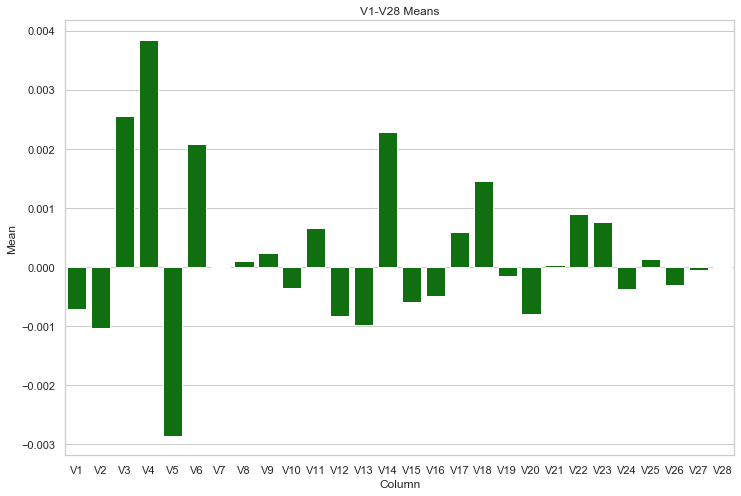

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Means')

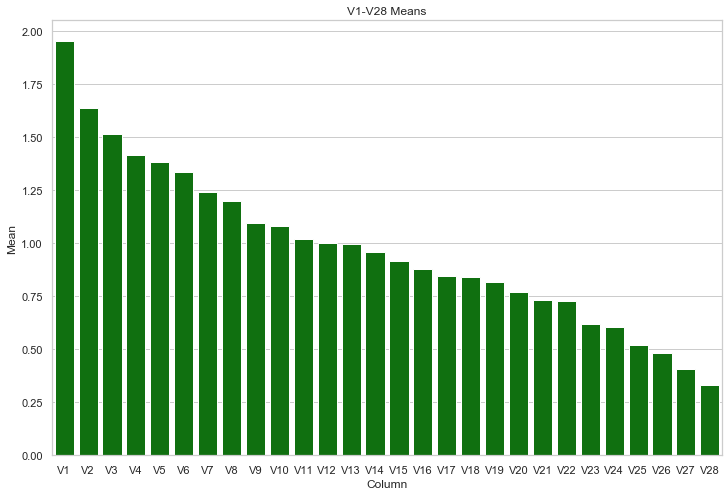

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

All of V1-V28 have approximately zero mean. The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9. Plot the skewnesses next:

Text(0.5, 1.0, 'V1-V28 Means')

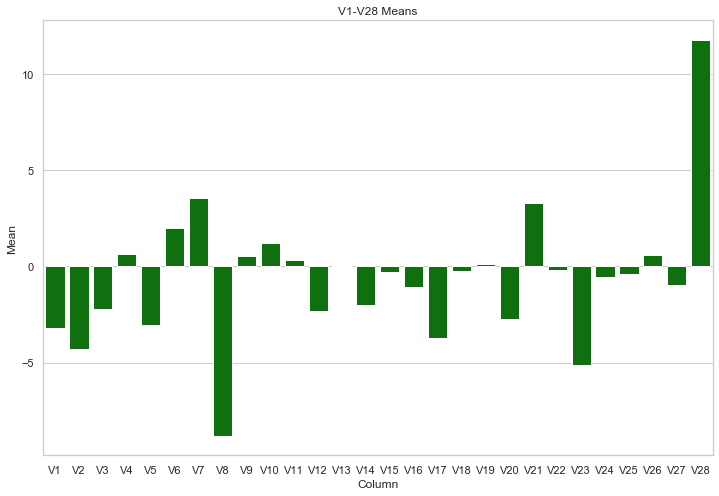

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.

Text(0.5, 1.0, 'V8')

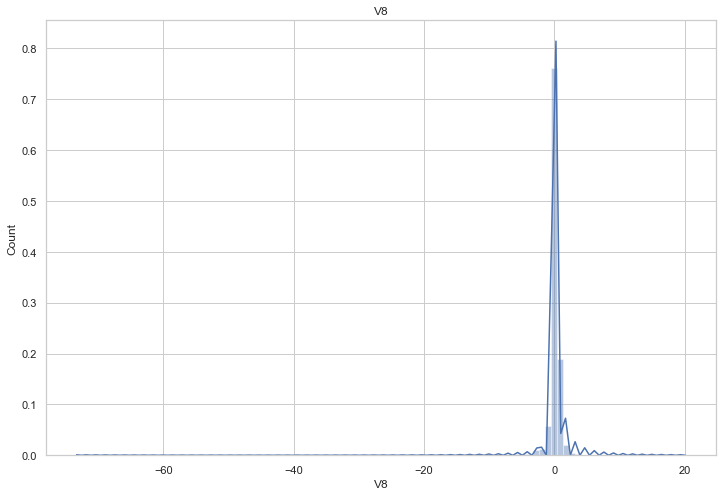

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['V8'], bins=100)
plt.ylabel('Count')
plt.title('V8')

The histogram doesn't show us outliers. Let's try a boxplot:

Text(0.5, 1.0, 'V8')

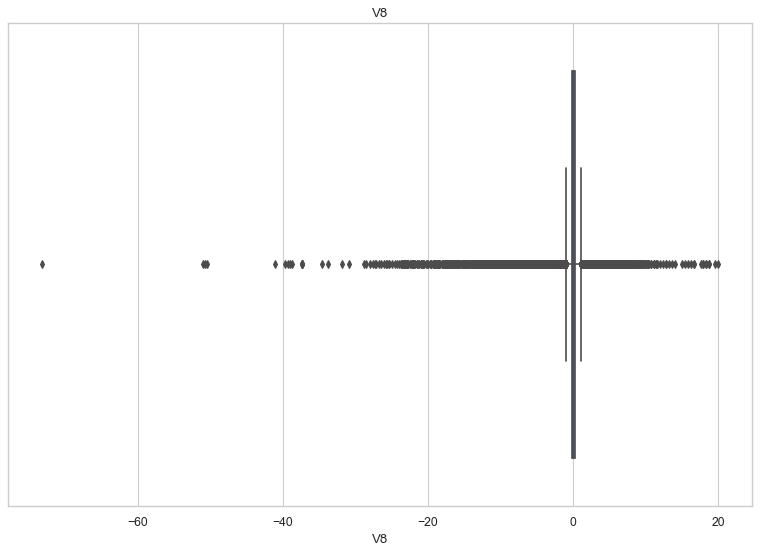

In [59]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

The boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in V8. This motivates us to plot the kurtoses of the PCA variables. The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0.

Note the log scale on the y-axis in the plot below:

Text(0.5, 1.0, 'V1-V28 Kurtoses')

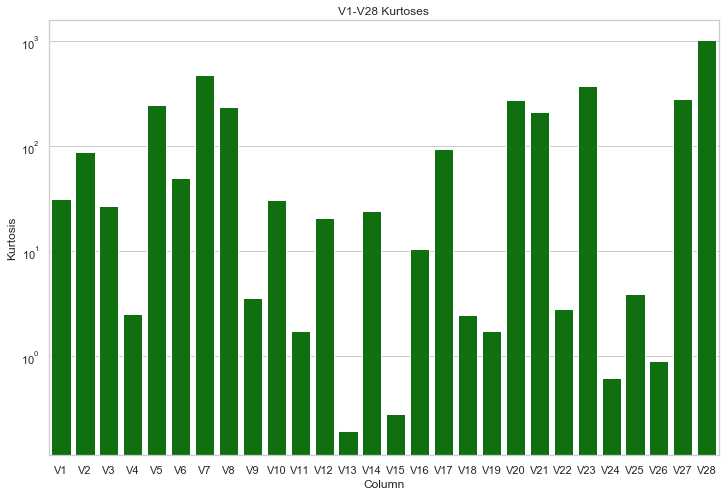

In [60]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='green')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

We've learned that many of the PCA variables are heavy-tailed. The large numbers of outliers in V1-V28 motivates us to consider robust descriptive statistics. Let's plot the medians:

Text(0.5, 1.0, 'V1-V28 Means')

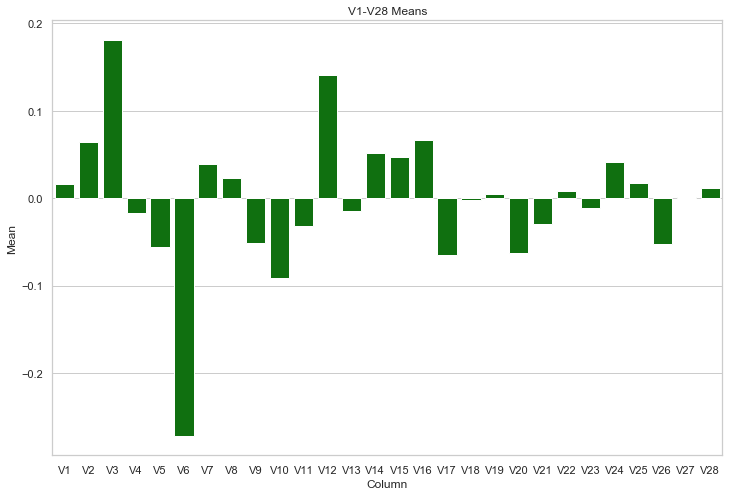

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

The medians are also roughly zero. Next let's look at the interquartile ranges (IQR)*:

Text(0.5, 1.0, 'V1-V28 IQRs')

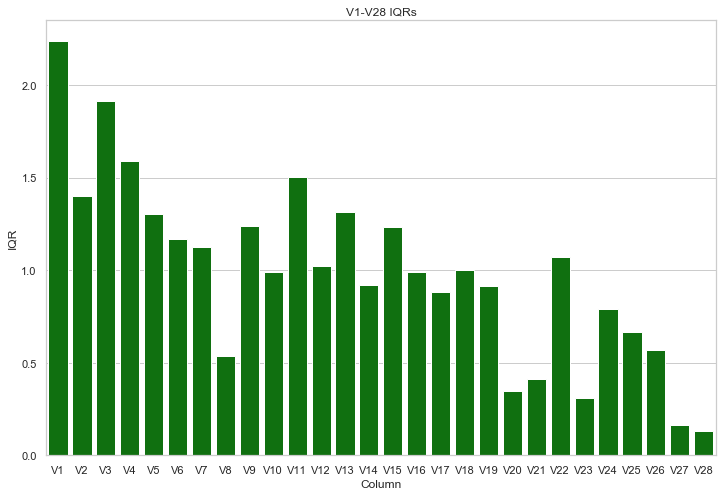

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='green')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

## Mutual Information between Fraud and the Predictors

Mutual information of 0 indicates no dependence, and higher values indicate higher dependence. According to the sklearn User Guide, "mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation." We have 227,845 training samples, so mutual information should work well. Because the target variable is discrete, we use mutual_info_classif (as opposed to mutual_info_regression for a continuous target).

In [63]:
from sklearn.feature_selection import mutual_info_classif

/Users/User-MC/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [64]:
data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1)

In [65]:
mutual_infos = pd.Series(data,index= X_train.columns)

The calculated mutual informations of each variable with Class, in descending order:

In [66]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001422
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64

The five most correlated variables with Class are, in decreasing order, V17, V14, V10, V12, and V11.

## Logistic Regression

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [68]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

The type of linear classifier is chosen with the loss hyperparameter. For a linear SVC we set loss = 'hinge', and for logistic regression we set loss = 'log'.

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [69]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by GridSearchCV, uses StratifiedKFold with 5 folds for the train/validation splits. We'll use matthews_corrcoef (the Matthews correlation coefficient, MCC) as our scoring metric.

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [71]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Perform the grid search:

In [72]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.3min finished


Mean cross-validated MCC score of the best estimator found:

In [73]:
grid_sgd.best_score_

0.8065093298614633

This is a pretty good MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. Now check the best hyperparameters found in the grid search:

In [74]:
grid_sgd.best_params_

{'model__alpha': 483.2930238571752,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

So the linear SVC performed better than logistic regression, and with a high level of regularization (𝛼≈483).

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

/Users/User-MC/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [76]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes much longer to train on this fairly large dataset, so we don't actually do a hyperparameter grid search, only specifiying the number of estimators. We'll leave the grid search implemented in case we decide to try different hyperparameter values in the future.

In [77]:
param_grid_rf = {'model__n_estimators': [75]}

In [78]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [79]:
grid_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                    

In [80]:
grid_rf.best_score_

0.8567203839327452

The random forest performed much better than the linear SVC

In [81]:
grid_rf.best_params_

{'model__n_estimators': 75}

## Test Set Evaluation of the Best Model

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [83]:
def classification_eval(estimator,X_test,y_test):
    y_pred=estimator.predict(X_test)
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred),'\n')
    
    print('Classification report')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print("Scalar Metrics")
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [84]:
classification_eval(grid_rf, X_test, y_test)

Confusion Matrix
[[56854    10]
 [   15    83]] 

Classification report
              precision    recall  f1-score   support

           0    0.99974   0.99982   0.99978     56864
           1    0.89247   0.84694   0.86911        98

    accuracy                        0.99956     56962
   macro avg    0.94610   0.92338   0.93445     56962
weighted avg    0.99955   0.99956   0.99956     56962

Scalar Metrics
          MCC = 0.86919
        AUPRC = 0.85098
        AUROC = 0.95924
Cohen's kappa = 0.86889
     Accuracy = 0.99956


According to the MCC, the random forest performed better on the test set than on the training set. This is probably due to the refit model being trained on the entire training data set, and not on the smaller CV folds.

## Conclusion

We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:

1. Split the data using a random, stratified train/test split with a test size of 20%
2. Box-Cox power transform of the transaction amounts to remove skewness in the data
3. Mean and variance standardization of all features as part of a machine learning pipeline

We used the Matthews correlation coefficient (MCC) to compare the performance of different models. In cross validation, the best linear model (logistic regression, linear SVC) achieved a cross-validated MCC score of 0.807, and a random forest achieved a cross-validated MCC score of 0.856. We therefore chose the random forest as the better model, which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.

## References

The following sources were used in compiling this report:

1. http://www.secrepo.com - Access to all the data sets originally
2. https://drive.google.com/drive/folders/1qBmJhVqPprD-esGKgtm6VLn_YOpjawJ- - Location of the tunnel.csv file was downloaded from
3. https://github.com/cyberdefendersprogram/MachineLearning/blob/master/Data_analysis/Network%20analysis/tunnel%20analysis.ipynb - Initial anlysis of dataset
4. https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html - showed me how to unstack groupby functions
5. https://stackoverflow.com/questions/29550414/how-to-split-column-of-tuples-in-pandas-dataframe - showed me how to turn a column with tuples in it into two columns
6. https://stackoverflow.com/questions/40207784/how-to-edit-the-label-font-sizes-on-building-a-treemap-with-squarify-in-python - used to edit the text size of the treeplot
7. https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#15.-Ordered-Bar-Chart - showed me a range of plots to visualise the data (allowed me to decided on treeplot)
8. https://s3-us-west-1.amazonaws.com/umbrella-static/index.html - Provided the data for this Umbrella Popularity List
9. https://www.kaggle.com/mlg-ulb/creditcardfraud - obtaining the credit card fraud data
10. https://www.kaggle.com/guptanandita/kernel7a055de514 - further analysis of the credit card fraud data
11. https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public - importing the data from a URL (used for tunnel as reading the same way as the Umbrella data gave me errors)
12. https://stackoverflow.com/questions/23464138/downloading-and-accessing-data-from-github-python - another method of importing data from a URL
